In [1]:
import pandas as pd 

# Data Cleaning

In [23]:
df= pd.read_csv ("Hackathon Data.csv",  usecols=[0, 1, 2, 3, 4])

<B> Translating into English <B>

In [24]:
#pip install googletrans==4.0.0-rc1 langdetect


In [25]:
import pandas as pd
from googletrans import Translator
from langdetect import detect

In [26]:
# Initialize the translator
translator = Translator()

# Function to detect and translate text if it's not in English
def translate_if_not_english(text):
    try:
        # Convert to lowercase for better language detection
        text_lower = text.lower()
        lang = detect(text_lower)
        # Translate if the detected language is not English
        if lang != 'en':
            translated_text = translator.translate(text, src='auto', dest='en').text
            return translated_text
    except:
        # If detection or translation fails, return the original text
        return text
    return text  # Return original text if already in English

# Apply the function to the 'content' column
df['content_translated'] = df['content'].apply(translate_if_not_english)

# Display the first few rows to check the translations
print(df[['content', 'content_translated']].head())

                                             content  \
0  I am a mid-sixty-year-old female with very dry...   
1                                    Best ever cream   
2  I use the entire line of ester lauder skin car...   
3                 Love the way it makes my face feel   
4  I usually get this product from the mall but f...   

                                  content_translated  
0  I am a mid-sixty-year-old female with very dry...  
1                                    Best ever cream  
2  I use the entire line of ester lauder skin car...  
3                 Love the way it makes my face feel  
4  I usually get this product from the mall but f...  


<B>Text Processing <B>

In [27]:
#pip install nltk

In [28]:
import string
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')  # This line resolves your issue
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define a function to preprocess text

def preprocess_text(text):
    # Ensure text is not null
    if pd.isnull(text):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    
    # Tokenize text
    words = word_tokenize(text)
    
    # Remove stopwords and lemmatize words
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    # Join words back into a single string
    return " ".join(words)

# Preprocess the 'content_translated' column
df['content_cleaned'] = df['content_translated'].apply(preprocess_text)

# Display the first few rows to verify
df[['content_translated', 'content_cleaned']]


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/faisalrahman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/faisalrahman/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/faisalrahman/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,content_translated,content_cleaned
0,I am a mid-sixty-year-old female with very dry...,midsixtyyearold female dry complexion moisturi...
1,Best ever cream,best ever cream
2,I use the entire line of ester lauder skin car...,use entire line ester lauder skin careleaves s...
3,Love the way it makes my face feel,love way make face feel
4,I usually get this product from the mall but f...,usually get product mall first time decided ge...
...,...,...
495,"I liked the feeling that leaves in the face, i...",liked feeling leaf face absorbs fast leave shine
496,I bought this product for my mother who found ...,bought product mother found perfumery relative...
497,Perfect,perfect
498,"If it is original, but I don't know what the m...",original dont know manufacturing date isthe cr...


#  TF-IDF Vectorization 
#Extract numerical features that represent the text content.

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd


# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=20, stop_words='english')  # Adjust max_features as needed

# Fit and transform the text data
tfidf_matrix = vectorizer.fit_transform(df['content_cleaned'])

# Convert the matrix to a DataFrame for easier interpretation
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Merge the TF-IDF features back to your original DataFrame
df_tfidf = pd.concat([df, tfidf_df], axis=1)

# Display the resulting DataFrame
df_tfidf.head()


,rating,title,content,verified,helpful,content_translated,content_cleaned,amazon,cream,dry,...,make,morning,night,price,product,sample,skin,use,using,year
0,5,Great moisturizer!,I am a mid-sixty-year-old female with very dry...,Verified Purchase,NaN,I am a mid-sixty-year-old female with very dry...,midsixtyyearold female dry complexion moisturi...,0.00000,0.0,0.490278,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.436986,0.0
1,5,Makes your face soft as a baby,Best ever cream,Verified Purchase,NaN,Best ever cream,best ever cream,0.00000,1.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
2,5,Quality products,I use the entire line of ester lauder skin car...,Verified Purchase,NaN,I use the entire line of ester lauder skin car...,use entire line ester lauder skin careleaves s...,0.00000,0.0,0.000000,...,0.000000,0.0,0.0,0.392873,0.000000,0.0,0.612463,0.350904,0.000000,0.0
3,5,As advertised,Love the way it makes my face feel,Verified Purchase,One person found this helpful,Love the way it makes my face feel,love way make face feel,0.00000,0.0,0.000000,...,0.551898,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
4,4,Satisfaction,I usually get this product from the mall but f...,Verified Purchase,3 people found this helpful,I usually get this product from the mall but f...,usually get product mall first time decided ge...,0.49255,0.0,0.000000,...,0.459318,0.0,0.0,0.000000,0.293754,0.0,0.000000,0.000000,0.423295,0.0


In [30]:
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit the vectorizer to your data (assuming df['content_cleaned'] contains the cleaned reviews)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['content_cleaned'])

# Convert the TF-IDF matrix to a DataFrame for easier inspection
feature_names = tfidf_vectorizer.get_feature_names_out()
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Sum the TF-IDF scores for each term
term_scores = df_tfidf.sum(axis=0)

# Create a DataFrame of terms and their total scores
term_score_df = pd.DataFrame(list(zip(feature_names, term_scores)), columns=['Term', 'Score'])

# Sort terms by their TF-IDF scores in descending order
term_score_df = term_score_df.sort_values(by='Score', ascending=False)

# Display the top 10 important terms
term_score_df.head(10)


,Term,Score
337,product,39.044581
90,cream,27.327515
399,skin,24.089759
255,love,22.705242
188,great,21.029261
182,good,20.573310
162,face,18.744028
153,excellent,17.124301
465,use,17.123219
244,like,14.478489


In [31]:
relevant_features = ['moisturizer','moisturizing','smell','nourishing','wrinkle','delivery',
                     'antiaging', '', 'texture', 'absorption','packaging',
                     'price','greasy','skinreaction', 'hydrated','dry','soft','hydration',
                     'thick', 'creamy', 'dense'
                    
                    
                    ]


In [32]:
# Filter the term_score_df for relevant features
relevant_term_scores = term_score_df[term_score_df['Term'].isin(relevant_features)]

# Display the filtered DataFrame
print(relevant_term_scores)


             Term      Score
332         price  12.768861
492       wrinkle   8.930541
111      delivery   8.740244
132           dry   7.157609
281   moisturizer   6.768894
408         smell   6.662744
416          soft   5.678429
304    nourishing   5.520521
282  moisturizing   5.175563
202      hydrated   4.986081
439       texture   4.175940
187        greasy   3.423152
113         dense   1.902187
94         creamy   1.722630
24      antiaging   1.636737
203     hydration   1.146435


In [33]:
# List of terms to exclude
exclude_terms = [
    'product', 'cream', 'skin', 'face', 'love', 'great', 'use','using', 'good',
    'color', 'appropriate', 'appropriate use', 'beige', 'beige color', 'case', 'case dense',
    'color compared', 'color havethat', 'compared','like','feel','year','lauder','perfect','order','best','used','este',
    'say','day', 'better','estée', 'help','amazon','make','difference','recommended','excellent','night','morning',
    'morning','worth', 'easy', 'time', 'amazing','estee','recommend','brand', 'sample','tried',
    'quick', 'high', 'described','fast', 'nice', 'definitely'
]


In [34]:
# Filter out the excluded terms
filtered_term_scores = term_score_df[~term_score_df['Term'].isin(exclude_terms)]

# Display the filtered DataFrame
filtered_term_scores.head(20)


,Term,Score
332,price,12.768861
492,wrinkle,8.930541
111,delivery,8.740244
344,quality,8.424706
132,dry,7.157609
281,moisturizer,6.768894
408,smell,6.662744
416,soft,5.678429
304,nourishing,5.520521
233,le,5.512191


In [35]:
final_key_features = [
    'price', 'wrinkle', 'delivery', 'dry', 'moisturizer', 'smell', 
    'soft', 'nourishing', 'moisturizing', 'hydrated', 'texture', 
    'greasy', 'antiaging', 'hydration','thick', 'creamy', 'dense'

]


In [36]:
#pip install rapidfuzz


In [37]:
from rapidfuzz import fuzz, process

# Create a mapping to store similar words
similar_word_mapping = {}

# Iterate through the final key features
for feature in final_key_features:
    # Find similar terms from term_scores
    similar_terms = process.extract(feature, term_score_df['Term'], scorer=fuzz.partial_ratio, limit=5)
    
    # Store similar terms and their scores
    similar_word_mapping[feature] = [term[0] for term in similar_terms if term[1] >= 80]  # Threshold 80 for similarity

# Display the mapping
for feature, similar_words in similar_word_mapping.items():
    print(f"{feature}: {similar_words}")


price: ['price', 'pricehere', 'nice', 'experience', 'perceived']
wrinkle: ['wrinkle', 'le']
delivery: ['delivery', 'live', 'ive', 'deal', 'dry']
dry: ['dry', 'delivery', 'mary', 'try', 'slippery']
moisturizer: ['moisturizer', 'moisture', 'moisturizing', 'mom']
smell: ['smell', 'smelled', 'suresmell', 'seller', 'fell']
soft: ['soft', 'soften', 'uso']
nourishing: ['nourishing', 'thing', 'nourished', 'diminishing', 'using']
moisturizing: ['moisturizing', 'moisture', 'moisturizer', 'mom']
hydrated: ['hydrated', 'hydration', 'wanted', 'red', 'end']
texture: ['texture', 'extremely', 'mature', 'red', 'extra']
greasy: ['easy', 'greasy', 'great', 'say', 'ready']
antiaging: ['aging', 'antiaging', 'aunt']
hydration: ['hydration', 'io', 'hydrated', 'lotion', 'non']
thick: ['thicker', 'sticky', 'think']
creamy: ['cream', 'creamy', 'creammy', 'creamsthis', 'creamminiature']
dense: ['dense', 'use', 'set']


In [38]:
# Refine the mappings manually
similar_word_mapping = {
    "price": ["price"],  # Exclude 'pricehere', 'nice', etc.
    "wrinkle": ["wrinkle"],  # Exclude 'le'
    "delivery": ["delivery"],  # Exclude 'live', 'ive', etc.
    "dry": ["dry"],  # Exclude unrelated matches like 'mary', 'try'
    "moisturizing": ["moisturizer", "moisture"],  # Keep valid variations
    "smell": ["smell", "smelled"],  # Exclude 'suresmell', 'seller'
    "soft": ["soft", "soften"],  # Valid match
    "nourishing": ["nourishing", "nourished"],  # Exclude 'thing', 'diminishing'
    "hydrated": ["hydrated", "hydration","hydrating"],  # Exclude 'wanted', 'red'
    "texture": ["texture"],  # Exclude 'extremely', 'mature', etc.
    "greasy": ["greasy"],  # Exclude 'easy', 'great'
    "antiaging": ["antiaging","aging"],  # Exclude, 'aunt'
    "thick": ["thicker", "sticky", "think"],
    "creamy": ["cream", "creamy", "creammy", "creamsthis", "creamminiature"],
    "dense": ["dense"]
}


In [39]:
# Initialize a dictionary for refined scores
refined_scores = {}

for feature, similar_words in similar_word_mapping.items():
    # Sum the scores of the refined similar words
    total_score = term_score_df[term_score_df['Term'].isin(similar_words)]['Score'].sum()
    refined_scores[feature] = total_score

# Convert to a DataFrame
refined_score_df = pd.DataFrame(list(refined_scores.items()), columns=['Term', 'Score'])

# Sort by score
refined_score_df = refined_score_df.sort_values(by='Score', ascending=False)

# Display the final refined features with scores
refined_score_df


,Term,Score
13,creamy,33.953836
0,price,12.768861
4,moisturizing,9.009331
1,wrinkle,8.930541
6,soft,8.746916
2,delivery,8.740244
5,smell,8.632907
7,nourishing,8.014754
3,dry,7.157609
12,thick,6.371603


# Sentiment Analysis

In [42]:
# Import necessary libraries
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

# Download the VADER lexicon if not done already
nltk.download('vader_lexicon')

# Initialize the SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis to the cleaned reviews
df['sentiment_scores'] = df['content_cleaned'].apply(lambda x: sid.polarity_scores(x))

# Extract the compound sentiment score
df['compound'] = df['sentiment_scores'].apply(lambda x: x['compound'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/faisalrahman/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [43]:
# Define a function to classify the sentiment based on the compound score
def sentiment_classification(score):
    if score > 0.07:  # Positive sentiment for scores greater than 0.07
        return 'positive'
    else:  # For scores less than or equal to 0.07, classify them as negative (including neutral scores)
        return 'negative'

# Apply sentiment classification
df['sentiment'] = df['compound'].apply(sentiment_classification)

# Show the cleaned content and sentiment classification
df[['content_cleaned', 'sentiment']]


,content_cleaned,sentiment
0,midsixtyyearold female dry complexion moisturi...,positive
1,best ever cream,positive
2,use entire line ester lauder skin careleaves s...,negative
3,love way make face feel,positive
4,usually get product mall first time decided ge...,positive
...,...,...
495,liked feeling leaf face absorbs fast leave shine,positive
496,bought product mother found perfumery relative...,positive
497,perfect,positive
498,original dont know manufacturing date isthe cr...,negative


# Sentiment Keywords Mapping

In [45]:
# Initialize a dictionary to store involvement data
feature_sentiment = {}

# Analyze each key feature's involvement with sentiments
for term in refined_score_df['Term']:
    # Count occurrences of the term in positive and negative reviews
    pos_count = df[df['sentiment'] == 'positive']['content_cleaned'].str.contains(term, case=False).sum()
    neg_count = df[df['sentiment'] == 'negative']['content_cleaned'].str.contains(term, case=False).sum()
    total_count = pos_count + neg_count
    
    # Calculate proportions if total count is not zero
    pos_proportion = pos_count / total_count if total_count > 0 else 0
    neg_proportion = neg_count / total_count if total_count > 0 else 0

    # Store results
    feature_sentiment[term] = {
        'positive_count': pos_count,
        'negative_count': neg_count,
        'positive_proportion': pos_proportion,
        'negative_proportion': neg_proportion,
        'total_mentions': total_count
    }

# Convert to DataFrame for better visualization
feature_sentiment_df = pd.DataFrame.from_dict(feature_sentiment, orient='index')
feature_sentiment_df


,positive_count,negative_count,positive_proportion,negative_proportion,total_mentions
creamy,0,5,0.000000,1.000000,5
price,55,5,0.916667,0.083333,60
moisturizing,15,0,1.000000,0.000000,15
wrinkle,20,5,0.800000,0.200000,25
soft,25,0,1.000000,0.000000,25
delivery,20,0,1.000000,0.000000,20
smell,35,0,1.000000,0.000000,35
nourishing,20,0,1.000000,0.000000,20
dry,40,0,1.000000,0.000000,40
thick,20,5,0.800000,0.200000,25


In [46]:
# Define a function to categorize features into just Positive or Negative
def categorize_feature(row):
    if row['positive_proportion'] > row['negative_proportion']:  # Positive dominant
        return 'Positive'
    elif row['negative_proportion'] > row['positive_proportion']:  # Negative dominant
        return 'Negative'
    else:  # Balanced or neutral cases, assign to a specific category
        return 'Negative'  # You can also return 'Positive' if needed for balanced cases

# Apply the function to categorize each feature
feature_sentiment_df['category'] = feature_sentiment_df.apply(categorize_feature, axis=1)

# Display the updated dataframe with only Positive and Negative categories
feature_sentiment_df[['positive_count', 'negative_count', 'positive_proportion', 'negative_proportion', 
                      'total_mentions', 'category']]


,positive_count,negative_count,positive_proportion,negative_proportion,total_mentions,category
creamy,0,5,0.000000,1.000000,5,Negative
price,55,5,0.916667,0.083333,60,Positive
moisturizing,15,0,1.000000,0.000000,15,Positive
wrinkle,20,5,0.800000,0.200000,25,Positive
soft,25,0,1.000000,0.000000,25,Positive
delivery,20,0,1.000000,0.000000,20,Positive
smell,35,0,1.000000,0.000000,35,Positive
nourishing,20,0,1.000000,0.000000,20,Positive
dry,40,0,1.000000,0.000000,40,Positive
thick,20,5,0.800000,0.200000,25,Positive



<B>Positive Dominant: Features where the positive sentiment proportion is greater than 0.75.<B><Br>
<B>Negative Dominant: Features where the negative sentiment proportion is greater than 0.75.<B><Br>

In [ ]:
# Write DataFrame to an Excel file
feature_sentiment_excel = 'feature_sentiment.xlsx'
feature_sentiment_df.to_excel(feature_sentiment_excel, index=True)

In [ ]:
feature_sentiment_df

# Random Forest for features importance

In [47]:
# Function to extract features for each review based on the refined mappings
def extract_features_with_mapping(review, similar_word_mapping):
    # Initialize counts for all refined features
    features = {key: 0 for key in similar_word_mapping.keys()}
    
    # Convert review to lowercase for case-insensitivity
    review_lower = review.lower()
    
    # Iterate through each refined feature and its associated terms
    for refined_feature, synonyms in similar_word_mapping.items():
        for synonym in synonyms:
            # Count occurrences of each synonym in the review
            features[refined_feature] += review_lower.count(synonym.lower())
    
    return features


In [48]:
# Apply the feature extraction function to each review in the dataset
X = df['content_cleaned'].apply(lambda x: extract_features_with_mapping(x, similar_word_mapping))

# Convert the resulting list of dictionaries into a DataFrame
X_df = pd.DataFrame(list(X))

# Ensure that `y` (target variable) is binary (1 for positive, 0 for negative)
y = df['sentiment'].map({'positive': 1, 'negative': 0})

# Check for mismatches in length between X and y
assert len(X_df) == len(y), f"Mismatch between X and y lengths: {len(X_df)} vs {len(y)}"


In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame with feature names and their importance scores
importance_df = pd.DataFrame({
    'feature': X_df.columns,
    'importance': feature_importances
})

# Sort features by importance
importance_df = importance_df.sort_values(by='importance', ascending=False)

# Display the feature importances
importance_df


              precision    recall  f1-score   support

           0       0.36      1.00      0.53        14
           1       1.00      0.71      0.83        86

    accuracy                           0.75       100
   macro avg       0.68      0.85      0.68       100
weighted avg       0.91      0.75      0.79       100



,feature,importance
13,creamy,0.152689
4,moisturizing,0.122067
0,price,0.102717
14,dense,0.077569
3,dry,0.073930
10,greasy,0.065217
5,smell,0.058554
6,soft,0.056059
8,hydrated,0.054550
12,thick,0.054382


In [ ]:
# Write DataFrame to an Excel file
importance_df_excel = 'importance_df.xlsx'
importance_df.to_excel(importance_df_excel, index=True)

# Visualization 

In [ ]:
import matplotlib.pyplot as plt

# Group the features into Positive and Negative categories based on the 'category' column
category_counts = feature_sentiment_df['category'].value_counts()

# Count the number of Positive and Negative categories
positive_count = category_counts[category_counts.index.str.contains('Positive')].sum()
negative_count = category_counts[category_counts.index.str.contains('Negative')].sum()

# Prepare data for the pie chart
labels = ['Positive', 'Negative']
sizes = [positive_count, negative_count]
colors = ['#FF9900', '#232F3E']  # Colors for Positive and Negative
explode = (0.1, 0)  # Explode the Positive slice slightly for emphasis

# Plot a pie chart with the adjusted colors and text properties
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%',  # Show percentage with 1 decimal point
    startangle=140, 
    colors=colors, 
    explode=explode,  # Slightly "explode" Positive slice
    textprops={'color': 'white'}
)

# Title and styling
plt.title('Sentiment Distribution of Features', color='#232F3E', fontsize=14)

# Customize the text for category labels and percentages
for text in texts:
    text.set_color('white')  # Set category names (Positive/Negative) to white
for autotext in autotexts:
    autotext.set_color('white')  # Set percentage values to white
    autotext.set_fontsize(12)  # Adjust font size for the percentages

# Add the legend to explain the colors
plt.legend(labels, loc="best", fontsize=12, frameon=False, labels=['Positive', 'Negative'])

plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Count the number of features in each category (Positive and Negative)
category_counts = feature_sentiment_df['category'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
category_counts.plot.bar(color=['#FF9900', '#232F3E'])  # Using the color scheme provided
plt.title('Number of Features in Positive and Negative Categories', color='#232F3E', fontsize=14)
plt.xlabel('Sentiment Category', color='#131921', fontsize=12)
plt.ylabel('Number of Features', color='#131921', fontsize=12)
plt.xticks(rotation=0, color='#131921', fontsize=10)
plt.show()


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# List of your key features (from your 'similar_word_mapping' or other list of important features)
key_features = ["price", "wrinkle", "delivery", "dry", "moisturizing", "smell", "soft", "nourishing", 
                "hydrating", "texture", "greasy", "antiaging", "thick", "creamy", "dense"]

# Extract feature importance data and filter for key features
important_features = importance_df[importance_df['feature'].isin(key_features)]

# Create a dictionary with feature names as keys and their importance as values
feature_dict = dict(zip(important_features['feature'], important_features['importance']))

# Create the word cloud with your custom color scheme
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='#131921',  # Dark background for contrast
    colormap=None,  # We'll define custom colors below
    contour_width=1, 
    contour_color='#FF9900',  # Outline color for the words
    relative_scaling=0.5
).generate_from_frequencies(feature_dict)

# Custom color function for the word cloud
def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    # Set colors based on the importance of the word
    return '#FF9900' if word in feature_dict else '#232F3E'  # Orange for important, Dark blue for others

# Recreate the wordcloud with the custom color function
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='#131921',  # Dark background for contrast
    color_func=custom_color_func,  # Custom color function applied here
    contour_width=1, 
    contour_color='#FF9900',  # Outline color for the words
    relative_scaling=0.5
).generate_from_frequencies(feature_dict)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Word Cloud of Key Features Based on Importance', fontsize=16, color='#FF9900')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom palette with shades close to #FF9900
custom_palette = ['#FF9900', '#FFB84D', '#FFCC80']

# Create a bar chart with the custom palette
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Term', data=top_features, palette=custom_palette)

# Add labels and title
plt.xlabel('Importance (Score)')
plt.ylabel('Key Features')
plt.title('Top 10 Key Features Based on Importance')

# Display the plot
plt.show()


In [ ]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create a bar plot for total mentions
sns.barplot(x=feature_sentiment_df.index, y='total_mentions', data=feature_sentiment_df, color='#FF9900')

# Add labels and title
plt.title('Total Mentions of Key Features')
plt.xlabel('Key Features')
plt.ylabel('Total Mentions')
plt.xticks(rotation=90)

# Show the plot
plt.show()


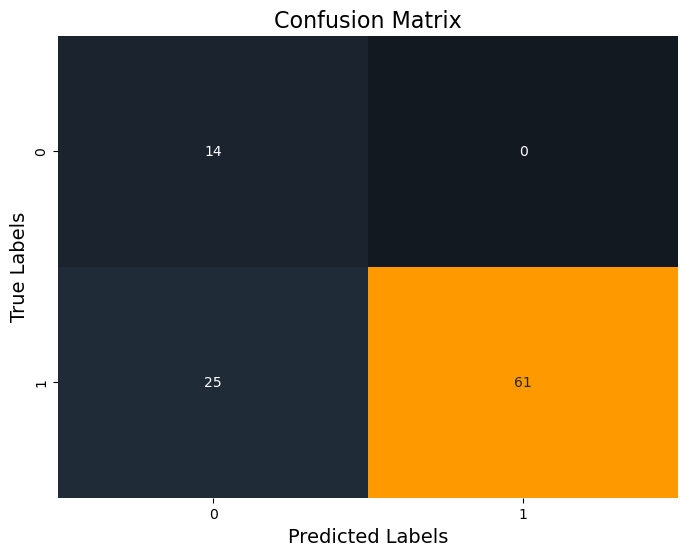

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from matplotlib.colors import LinearSegmentedColormap

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a custom colormap using your three colors
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["#131921", "#232F3E", "#FF9900"], N=100)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=custom_cmap, cbar=False, xticklabels=model.classes_, yticklabels=model.classes_)

# Add titles and labels
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()


In [91]:
# Get the classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert the dictionary to a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Display the DataFrame
report_df

,precision,recall,f1-score,support
0,0.358974,1.000000,0.528302,14.00
1,1.000000,0.709302,0.829932,86.00
accuracy,0.750000,0.750000,0.750000,0.75
macro avg,0.679487,0.854651,0.679117,100.00
weighted avg,0.910256,0.750000,0.787704,100.00


In [89]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Convert the confusion matrix into a pandas DataFrame
cm_df = pd.DataFrame(cm, index=model.classes_, columns=model.classes_)

# Display the confusion matrix DataFrame
print(cm_df)


    0   1
0  14   0
1  25  61


In [92]:
import pandas as pd
from sklearn.metrics import classification_report

# Assuming y_test and y_pred are already defined
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Style the DataFrame for a colorful display
styled_report = report_df.style.background_gradient(cmap='coolwarm', subset=['precision', 'recall', 'f1-score', 'support'])

# Display the styled DataFrame
styled_report


,precision,recall,f1-score,support
0,0.358974,1.000000,0.528302,14.000000
1,1.000000,0.709302,0.829932,86.000000
accuracy,0.750000,0.750000,0.750000,0.750000
macro avg,0.679487,0.854651,0.679117,100.000000
weighted avg,0.910256,0.750000,0.787704,100.000000


In [95]:
import pandas as pd
from sklearn.metrics import classification_report
from matplotlib.colors import LinearSegmentedColormap

# Assuming y_test and y_pred are already defined
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Define a custom colormap using your colors
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["#131921", "#232F3E", "#FF9900"])

# Style the DataFrame with the custom colormap
styled_report = report_df.style.background_gradient(cmap=custom_cmap, subset=['precision', 'recall', 'f1-score', 'support'])

# Display the styled DataFrame
styled_report


,precision,recall,f1-score,support
0,0.358974,1.000000,0.528302,14.000000
1,1.000000,0.709302,0.829932,86.000000
accuracy,0.750000,0.750000,0.750000,0.750000
macro avg,0.679487,0.854651,0.679117,100.000000
weighted avg,0.910256,0.750000,0.787704,100.000000
